In [34]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

from datetime import datetime
import statistics as stat
from scipy.stats.stats import pearsonr

import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

rcParams['figure.figsize'] = 6, 4
sb.set_style('whitegrid')


In [35]:
data = pd.read_csv('best_five_zipcodes.csv')

## Initial data exploration

In [36]:
#data.describe()

## Remove the negative sqft records from dataframe

In [37]:
# dro records with negative livable sqft
data[data['livable_sqft']<0]

,Unnamed: 0,year_built,stories,num_bedrooms,full_bathrooms,half_bathrooms,livable_sqft,total_sqft,garage_type,garage_sqft,...,has_pool,has_central_heating,has_central_cooling,house_number,street_name,unit_number,city,zip_code,sale_price,Year_levels
6669,34817,1977,1,2,1,1,-2,6,attached,-3,...,False,True,True,399,Holland Valleys,NaN,Port Jonathanborough,10250,505261.0,1968-1984


In [38]:
data = data.drop(6669) #drop row
data.shape

(8098, 22)

In [39]:
#drop records with negative garage sqrt
data = data[data['garage_sqft']>10]
data.shape

(7728, 22)

## Number of houses built over time binned into categorical valuables

In [40]:
bins = np.linspace(1850,2018, num =11)  #create bins => np.linspace(min,max,numberOfBins)
data["Year_levels"] = pd.cut(data['year_built'],bins,labels= ['1850- 1866','1867-1883','1884-1900','1901-1917','1918-1934',
                                                              '1935-1950','1951-1967','1968-1984','1985-2001','2002-2018'])#divide dataset
data.groupby("Year_levels").size(), bins #show bin sises and bins

(Year_levels
 1850- 1866       0
 1867-1883        0
 1884-1900        0
 1901-1917        1
 1918-1934        8
 1935-1950       29
 1951-1967       61
 1968-1984      354
 1985-2001     2531
 2002-2018     4744
 dtype: int64,
 array([1850. , 1866.8, 1883.6, 1900.4, 1917.2, 1934. , 1950.8, 1967.6,
        1984.4, 2001.2, 2018. ]))

## Number of houses built in years

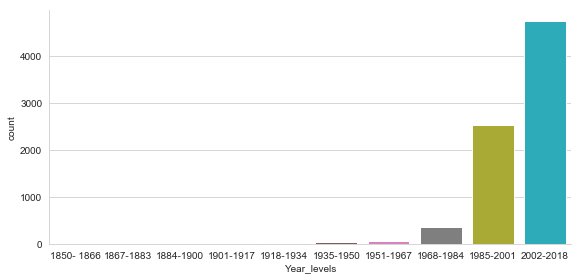

In [41]:
sb.catplot('Year_levels', order=['1850- 1866','1867-1883','1884-1900','1901-1917','1918-1934',
                            '1935-1950','1951-1967','1968-1984','1985-2001','2002-2018'], data= data, kind='count',
          height = 4, aspect =2)

## popularity of bedrooms.

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

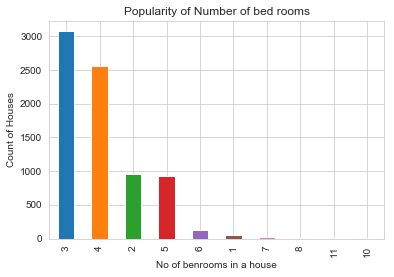

In [42]:
data['num_bedrooms'].value_counts().plot(kind = 'bar')
plt.title('Popularity of Number of bed rooms')
plt.xlabel("No of benrooms in a house")
plt.ylabel('Count of Houses')
sb.despine

## popularity of cities based on number of houses

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

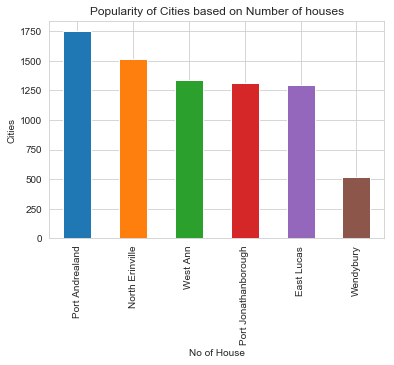

In [43]:
data['city'].value_counts().plot(kind = 'bar')
plt.title('Popularity of Cities based on Number of houses')
plt.xlabel("No of House")
plt.ylabel('Cities')
sb.despine

## popularity of garage types

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

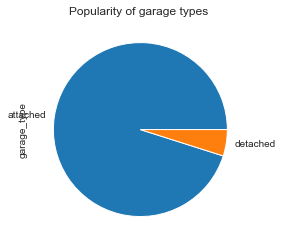

In [44]:
data['garage_type'].value_counts().plot(kind = 'pie')
plt.title('Popularity of garage types ')
# plt.xlabel("No of Houses")
# plt.ylabel('Garage Type')
sb.despine

## popularity of swimming pools

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

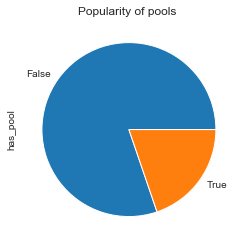

In [45]:
data['has_pool'].value_counts().plot(kind = 'pie')
plt.title('Popularity of pools ')
# plt.xlabel("No of Houses")
# plt.ylabel('Garage Type')
sb.despine

## popularity of central cooling

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

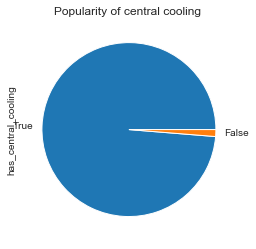

In [46]:
data['has_central_cooling'].value_counts().plot(kind = 'pie')
plt.title('Popularity of central cooling ')
# plt.xlabel("No of Houses")
# plt.ylabel('Garage Type')
sb.despine

## Popularity of central heating

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

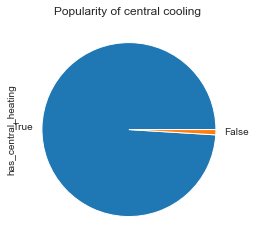

In [83]:
data['has_central_heating'].value_counts().plot(kind = 'pie')
plt.title('Popularity of central cooling ')
# plt.xlabel("No of Houses")
# plt.ylabel('Garage Type')
sb.despine

In [ ]:
Correlation between  sell price and other variables

## How are other variables affecting the price. (Correlation between  sell price and other variables).

In [47]:
#correlation btwn year bilt and house
data['year_built'].corr(data['sale_price'])

0.13888251506879182

Text(0, 0.5, 'YEAR BUILT')

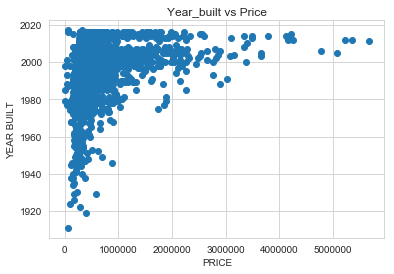

In [48]:
plt.scatter(data.sale_price,data.year_built)
plt.title('Year_built vs Price')
plt.xlabel('PRICE')
plt.ylabel('YEAR BUILT')

In [49]:
data['full_bathrooms'].corr(data['sale_price']) , min(data['full_bathrooms']), max(data['full_bathrooms'])

(0.43210239912522164, 0, 8)

Text(0, 0.5, 'BATH ROOMs')

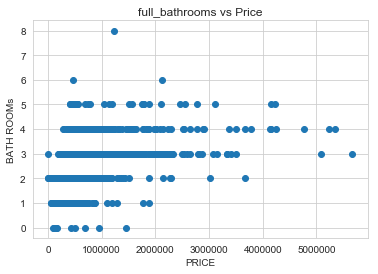

In [50]:
plt.scatter(data.sale_price,data.full_bathrooms)
plt.title('full_bathrooms vs Price')
plt.xlabel('PRICE')
plt.ylabel('BATH ROOMs')

In [51]:
data['total_sqft'].corr(data['sale_price']) , min(data['total_sqft']), max(data['total_sqft'])

(0.6858211407366, 566, 11302)

Text(0, 0.5, 'TOTAl SQRFT')

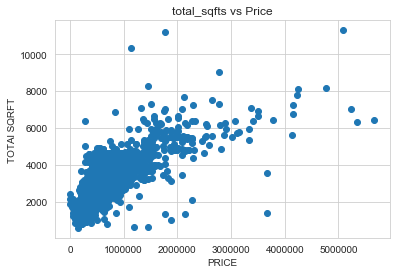

In [52]:
plt.scatter(data.sale_price,data.total_sqft)
plt.title('total_sqfts vs Price')
plt.xlabel('PRICE')
plt.ylabel('TOTAl SQRFT')

In [53]:
data['garage_sqft'].corr(data['sale_price']) , min(data['garage_sqft']), max(data['garage_sqft'])

(0.4812026406429889, 156, 4512)

Text(0, 0.5, 'garage_sqft')

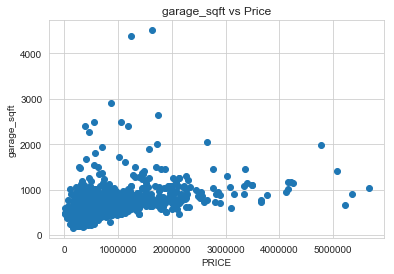

In [54]:
plt.scatter(data.sale_price,data.garage_sqft)
plt.title('garage_sqft vs Price')
plt.xlabel('PRICE')
plt.ylabel('garage_sqft')

In [55]:
data['livable_sqft'].corr(data['sale_price']) , min(data['livable_sqft']), max(data['livable_sqft'])

(0.6175885856398755, 522, 9101)

Text(0, 0.5, 'livable_sqft')

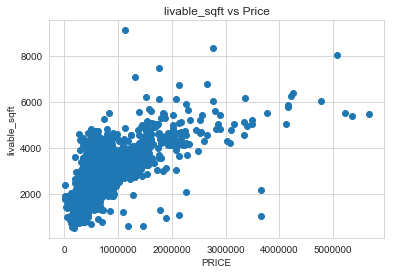

In [56]:
plt.scatter(data.sale_price,data.livable_sqft)
plt.title('livable_sqft vs Price')
plt.xlabel('PRICE')
plt.ylabel('livable_sqft')

# END CORR

In [57]:
data.sort_values(by = 'sale_price').head()

,Unnamed: 0,year_built,stories,num_bedrooms,full_bathrooms,half_bathrooms,livable_sqft,total_sqft,garage_type,garage_sqft,...,has_pool,has_central_heating,has_central_cooling,house_number,street_name,unit_number,city,zip_code,sale_price,Year_levels
6103,32294,1979,1,3,2,1,1772,1877,attached,473,...,True,True,True,408,Maria Square,NaN,West Ann,10748,2518.0,1968-1984
699,4322,1998,2,4,2,1,2372,2402,attached,600,...,False,True,True,6075,Theresa Vista,NaN,Port Andrealand,11295,6930.0,1985-2001
6093,32229,1985,1,3,3,0,1926,2159,attached,482,...,False,True,True,974,Kristen Vista,NaN,West Ann,10748,7560.0,1985-2001
1105,5923,2001,1,3,2,1,1755,1894,attached,500,...,False,True,True,59093,David Fields,NaN,West Ann,10748,37168.0,1985-2001
3028,15703,1988,1,3,2,0,1410,1691,attached,530,...,False,True,True,756,Rachel Crescent,NaN,West Ann,10748,37801.0,1985-2001


In [58]:
len(data[data['sale_price'] < 100_000])

13

In [59]:
len(data[data['garage_sqft']< 0]) # negative values 

0

In [60]:
data[data['livable_sqft']< 0]

,Unnamed: 0,year_built,stories,num_bedrooms,full_bathrooms,half_bathrooms,livable_sqft,total_sqft,garage_type,garage_sqft,...,has_pool,has_central_heating,has_central_cooling,house_number,street_name,unit_number,city,zip_code,sale_price,Year_levels


In [61]:
oldyear = data[data['year_built'] < 2000].groupby('year_built').size()
oldyear.sort_values(ascending = False).head()

year_built
1989    209
1988    178
1999    169
1990    166
1991    136
dtype: int64

In [62]:
year = data[data['year_built'] >= 2000].groupby('year_built').size()
year.head()

year_built
2000    242
2001    329
2002    390
2003    472
2004    502
dtype: int64

In [63]:
data.groupby('city').size().sort_values(ascending = False).head()

city
Port Andrealand         1751
North Erinville         1513
West Ann                1339
Port Jonathanborough    1314
East Lucas              1295
dtype: int64

## Data Wrangling
change garage type to 
### Replace categorical data with one-hot encoded data
data = pd.get_dummies(data, columns=['garage_type', 'city']


In [64]:
d = pd.get_dummies(data, columns=['garage_type', 'city'])
d.columns                      

Index(['Unnamed: 0', 'year_built', 'stories', 'num_bedrooms', 'full_bathrooms',
       'half_bathrooms', 'livable_sqft', 'total_sqft', 'garage_sqft',
       'carport_sqft', 'has_fireplace', 'has_pool', 'has_central_heating',
       'has_central_cooling', 'house_number', 'street_name', 'unit_number',
       'zip_code', 'sale_price', 'Year_levels', 'garage_type_attached',
       'garage_type_detached', 'city_East Lucas', 'city_North Erinville',
       'city_Port Andrealand', 'city_Port Jonathanborough', 'city_Wendybury',
       'city_West Ann'],
      dtype='object')

In [65]:
d.head()

,Unnamed: 0,year_built,stories,num_bedrooms,full_bathrooms,half_bathrooms,livable_sqft,total_sqft,garage_sqft,carport_sqft,...,sale_price,Year_levels,garage_type_attached,garage_type_detached,city_East Lucas,city_North Erinville,city_Port Andrealand,city_Port Jonathanborough,city_Wendybury,city_West Ann
0,24,2007,1,2,2,0,1311,1694,206,0,...,311217.0,2002-2018,0,1,0,0,0,0,0,1
3,28,2003,1,3,2,1,4078,5034,925,0,...,1354501.0,2002-2018,0,1,0,0,0,0,0,1
4,29,1986,1,2,2,0,1390,1642,466,0,...,491401.0,1985-2001,0,1,0,0,0,0,0,1
5,30,1973,1,2,2,1,2195,3352,507,0,...,321298.0,1968-1984,0,1,0,0,0,0,0,1
6,31,1973,1,2,2,1,2205,3264,505,0,...,466199.0,1968-1984,0,1,0,0,0,0,0,1


In [66]:
data.groupby('zip_code').size().sort_values(ascending = False).head()

zip_code
10250    1830
11295    1751
11510    1513
10748    1339
11911    1295
dtype: int64

In [67]:
selected_zip_codes = data[data['zip_code'].isin ([10250,11295 ,11510,10748,11911])]
selected_zip_codes.shape

(7728, 22)

### This code doesnt run

selected_zip_codes.to_csv('best_five_zipcodes.csv')
selected_zip_codes.head()

In [68]:
#drop cols not needed
d_new = d.drop(columns=['house_number','street_name','unit_number','Year_levels'])

In [69]:
d_new.shape

(7728, 24)

In [70]:
d_new.shape

(7728, 24)

## THE ML MODEL

In [71]:
#call the regresson function and save in variable called reg
reg= LinearRegression()
#create x and y arrays
X = d_new.drop('sale_price',axis =1)
Y = d_new['sale_price']

In [72]:
#create Arrays for x and y
x = X.values
y = Y.values
y,x

(array([ 311217., 1354501.,  491401., ...,  767337.,  585902.,  817736.]),
 array([[24, 2007, 1, ..., 0, 0, 1],
        [28, 2003, 1, ..., 0, 0, 1],
        [29, 1986, 1, ..., 0, 0, 1],
        ...,
        [42327, 1997, 1, ..., 0, 0, 1],
        [42328, 1989, 1, ..., 0, 0, 1],
        [42353, 2003, 1, ..., 0, 0, 1]], dtype=object))

In [73]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size =.2, random_state = 0)

In [74]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [75]:
reg.score(X_test,y_test)

0.6124491134940501

## MY model pridiction is very low so i have to use gradient Boasting

In [76]:
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.externals import joblib

In [77]:
model = ensemble.GradientBoostingRegressor(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=6,
    min_samples_leaf=9,
    max_features=0.1,
    loss='huber'
)

In [78]:
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=6,
             max_features=0.1, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=9, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [79]:
model.score(X_test ,y_test)

0.8249444875370628

In [80]:
# Save the trained model to a file so we can use it in other programs
joblib.dump(model, 'trained_house_classifier_model.pkl')

# Find the error rate on the training set
mse = mean_absolute_error(y_train, model.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mse)

# Find the error rate on the test set
mse = mean_absolute_error(y_test, model.predict(X_test))
print("Test Set Mean Absolute Error: %.4f" % mse)

Training Set Mean Absolute Error: 32926.9062
Test Set Mean Absolute Error: 52747.0878


## the data sent to pop_cities
ive added 4 rows with zero values

In [81]:
d_new.loc[8200] = np.zeros(24)
d_new.loc[8201] = np.zeros(24)
d_new.loc[8202] = np.zeros(24)
d_new.loc[8203] = np.zeros(24)


In [82]:
d_new.to_csv('pop_cities2.csv')